In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class HMM(object):
    
    def __init__(self, transition_matrix, current_state):
        self.transition_matrix = transition_matrix
        self.current_state = current_state
      
    def filtering(self, observation_matrix):
        new_state = np.dot(observation_matrix, np.dot(self.transition_matrix, self.current_state))
        new_state_normalized = new_state / np.sum(new_state)
        self.current_state = new_state_normalized
        return new_state_normalized
    
    def prediction(self):
        new_state = np.dot(self.transition_matrix, self.current_state)
        new_state_normalized = new_state / np.sum(new_state)
        self.current_state = new_state_normalized
        return new_state_normalized

    def plot_state(self):
        fig = plt.figure(figsize=(10, 8))
        ax1 = fig.add_subplot(111, projection='3d')

        # Create a 7x7 grid
        x = np.arange(7)
        y = np.arange(7)
        x, y = np.meshgrid(x, y)

        # Flatten the grid for bar3d
        xpos = x.flatten()
        # Reverse the order of y to start from the top
        ypos = y[::-1].flatten()
        zpos = np.zeros_like(xpos)
        dx = np.ones_like(xpos)
        dy = np.ones_like(xpos)
        dz = self.current_state.flatten()

        # Plot 3D bars
        ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='pink')

        # Set ticks
        ax1.set_xticks(np.arange(7))
        ax1.set_yticks(np.arange(7))

        # Show the plot
        plt.savefig('map2.png')
        plt.show()
        

    def create_observation_matrix(self, error_rate, no_discrepancies):
        sensor_list = []
        for number in no_discrepancies:
            probability = (1 - error_rate) ** (4 - number) * error_rate ** number
            sensor_list.append(probability)
        observation_matrix = np.zeros((len(sensor_list), len(sensor_list)))
        np.fill_diagonal(observation_matrix, sensor_list)
        return observation_matrix

    def map(self, index_square):
        # Define the names for each square
        square_names = [f'S{i+1}' for i in range(49)]

        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(10, 10))

        # Set the aspect ratio to 'equal' to make the squares actual squares
        ax.set_aspect('equal')

        # Loop through each square and draw it with the corresponding label<
        for i, name in enumerate(square_names):
            # Calculate coordinates based on the desired order (left to right, top to bottom)
            x = i % 7  # x-coordinate (0 to 6)
            y = 6 - i // 7  # y-coordinate (6 to 0)

            # Draw a square at the center of the current position
            square = plt.Rectangle((x, y), 1, 1, fill=True, edgecolor='gray', facecolor='white')
            ax.add_patch(square)

            # Add the label in the center of the square
            ax.text(x + 0.5, y + 0.5, name, ha='center', va='center', fontsize=8)

        # Set axis limits and remove ticks
        ax.set_xlim(0, 7)
        ax.set_ylim(0, 7)
        ax.set_xticks([])
        ax.set_yticks([])

        # Make the line between obstacle thicker
        line_between_s8_s9 = plt.Line2D([1, 1], [1, 2], color='black', linewidth=3)
        ax.add_line(line_between_s8_s9)
        
        line_between_s10_s11 = plt.Line2D([3, 3], [1, 2], color='black', linewidth=3)
        ax.add_line(line_between_s10_s11)
        
        line_between_s11_s12 = plt.Line2D([4, 4], [1, 2], color='black', linewidth=3)
        ax.add_line(line_between_s11_s12)
        
        line_between_s13_s14 = plt.Line2D([6, 6], [1, 2], color='black', linewidth=3)
        ax.add_line(line_between_s13_s14)

        line_between_s22_s23 = plt.Line2D([1, 1], [3, 4], color='black', linewidth=3)
        ax.add_line(line_between_s22_s23)
        
        line_between_s24_s25 = plt.Line2D([3, 3], [3, 4], color='black', linewidth=3)
        ax.add_line(line_between_s24_s25)
        
        line_between_s25_s26 = plt.Line2D([4, 4], [3, 4], color='black', linewidth=3)
        ax.add_line(line_between_s25_s26)
        
        line_between_s27_s28 = plt.Line2D([6, 6], [3, 4], color='black', linewidth=3)
        ax.add_line(line_between_s27_s28)

        line_between_s36_s37 = plt.Line2D([1, 1], [5, 6], color='black', linewidth=3)
        ax.add_line(line_between_s36_s37)
        
        line_between_s38_s39 = plt.Line2D([3, 3], [5, 6], color='black', linewidth=3)
        ax.add_line(line_between_s38_s39)
        
        line_between_s39_s40 = plt.Line2D([4, 4], [5, 6], color='black', linewidth=3)
        ax.add_line(line_between_s39_s40)
        
        line_between_s41_s42 = plt.Line2D([6, 6], [5, 6], color='black', linewidth=3)
        ax.add_line(line_between_s41_s42)

        line_between_h1 = plt.Line2D([1, 3], [1, 1], color='black', linewidth=3)
        ax.add_line(line_between_h1)
        line_between_h2 = plt.Line2D([4, 6], [1, 1], color='black', linewidth=3)
        ax.add_line(line_between_h2)
        line_between_h3 = plt.Line2D([1, 3], [2, 2], color='black', linewidth=3)
        ax.add_line(line_between_h3)
        line_between_h4 = plt.Line2D([4, 6], [2, 2], color='black', linewidth=3)
        ax.add_line(line_between_h4)
        line_between_h5 = plt.Line2D([1, 3], [3, 3], color='black', linewidth=3)
        ax.add_line(line_between_h5)
        line_between_h6 = plt.Line2D([4, 6], [3, 3], color='black', linewidth=3)
        ax.add_line(line_between_h6)
        line_between_h7 = plt.Line2D([1, 3], [4, 4], color='black', linewidth=3)
        ax.add_line(line_between_h7)
        line_between_h8 = plt.Line2D([4, 6], [4, 4], color='black', linewidth=3)
        ax.add_line(line_between_h8)
        line_between_h9 = plt.Line2D([1, 3], [5, 5], color='black', linewidth=3)
        ax.add_line(line_between_h9)
        line_between_h10 = plt.Line2D([4, 6], [5, 5], color='black', linewidth=3)
        ax.add_line(line_between_h10)
        line_between_h11 = plt.Line2D([1, 3], [6, 6], color='black', linewidth=3)
        ax.add_line(line_between_h11)
        line_between_h12 = plt.Line2D([4, 6], [6, 6], color='black', linewidth=3)
        ax.add_line(line_between_h12)

        # Access the specified square and change its fill color to red
        specific_square = ax.patches[index_square]
        specific_square.set_facecolor('pink')
        # Display the plot
        plt.savefig('map1.png')
        plt.show()
       
        



In [4]:
# Define the tw models

csv_file_path = 'Matrix.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path, sep=';', header=None)

# Convert the DataFrame to a NumPy array
transition_matrix = df.to_numpy()


initial_state=np.full(49,1/49)

Model = HMM(transition_matrix,initial_state)

print(Model.current_state)


[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816]


In [5]:
#   create observation matrices
observation_matrix_N = Model.create_observation_matrix(0.2,[1,1,1,0,1,1,1,3,4,4,3,4,4,3,2,1,1,4,1,1,2,3,4,4,4,4,4,3,2,1,1,4,1,1,2,3,4,4,4,4,4,3,3,1,1,2,1,1,3])
observation_matrix_NS = Model.create_observation_matrix(0.2,[2,0,0,1,0,0,2,4,4,4,4,4,4,4,3,0,0,2,0,0,3,4,4,4,4,4,4,4,3,0,0,2,0,0,3,4,4,4,4,4,4,4,2,0,0,1,0,0,2])
observation_matrix_NE = Model.create_observation_matrix(0.2,[2,2,2,1,2,2,0,2,4,4,2,4,4,2,3,2,2,2,2,2,1,2,4,4,2,4,4,2,3,2,2,2,2,2,1,2,4,4,2,4,4,2,4,2,2,3,2,2,2])
observation_matrix_NW = Model.create_observation_matrix(0.2,[0,2,2,1,2,2,2,1,4,4,2,4,4,2,1,2,2,2,2,2,3,1,4,4,2,4,4,2,1,2,2,2,2,2,3,2,4,4,2,4,4,2,2,2,2,3,2,2,4])
observation_matrix_W = Model.create_observation_matrix(0.2,[1,3,3,2,3,3,3,1,4,4,1,4,4,1,0,3,3,1,3,3,2,1,4,4,1,4,4,1,0,3,3,1,3,3,2,1,4,4,1,4,4,1,1,3,3,2,3,3,3])
observation_matrix_WS = Model.create_observation_matrix(0.2,[2,2,2,3,2,2,4,2,4,4,2,4,4,2,1,2,2,2,2,2,3,2,4,4,2,4,4,2,1,2,2,2,2,2,3,2,4,4,2,4,4,2,0,2,2,1,2,2,2])
observation_matrix_EW = Model.create_observation_matrix(0.2,[2,4,4,3,4,4,2,0,4,4,0,4,4,0,1,4,4,2,4,4,1,0,4,4,0,4,4,0,1,4,4,2,4,4,1,0,4,4,0,4,4,0,2,4,4,3,4,4,2])
observation_matrix_E = Model.create_observation_matrix(0.2,[3,3,3,2,3,3,1,1,4,4,1,4,4,1,2,3,3,1,3,3,0,1,4,4,1,4,4,1,2,3,3,1,3,3,0,1,4,4,1,4,4,1,3,3,3,2,3,3,1])
observation_matrix_ES = Model.create_observation_matrix(0.2,[4,2,2,3,2,2,2,2,4,4,2,4,4,2,3,2,2,2,2,2,1,2,4,4,2,4,4,2,3,2,2,2,2,2,1,2,4,4,2,4,4,2,2,2,2,1,2,2,0])
observation_matrix_S = Model.create_observation_matrix(0.2,[3,1,1,2,1,1,2,3,4,4,3,4,4,3,2,1,1,1,1,1,2,3,4,4,3,4,4,3,2,1,1,1,1,1,2,3,4,4,3,4,4,3,1,1,1,0,1,1,1])
observation_matrix_NOdet = Model.create_observation_matrix(0.2,[2,2,2,1,2,2,2,2,4,4,2,4,4,2,1,2,2,0,2,2,1,2,4,4,2,4,4,2,1,2,2,0,2,2,1,2,4,4,2,4,4,2,2,2,2,1,2,2,2])


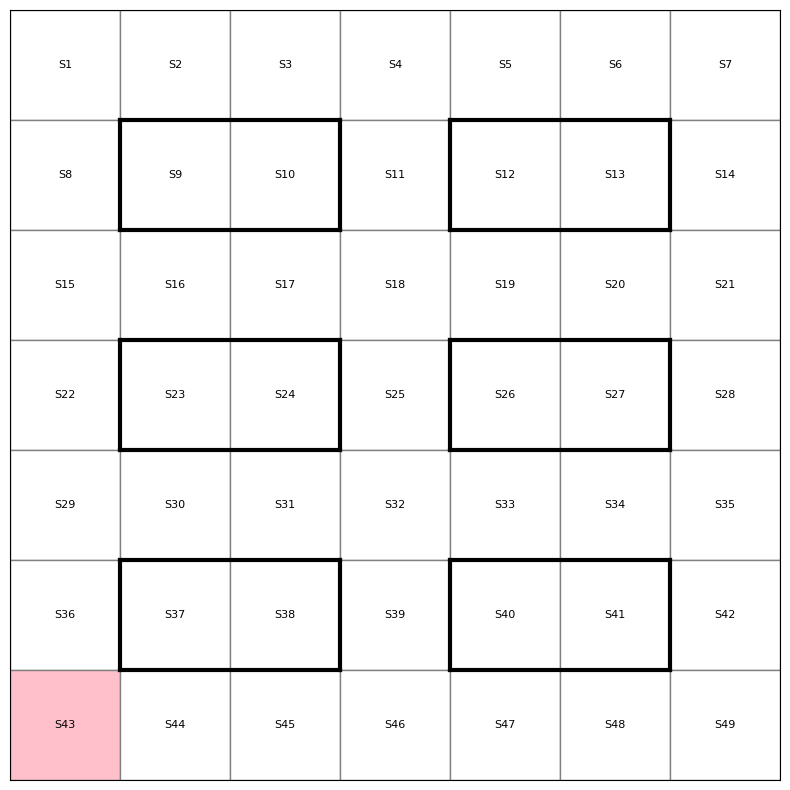

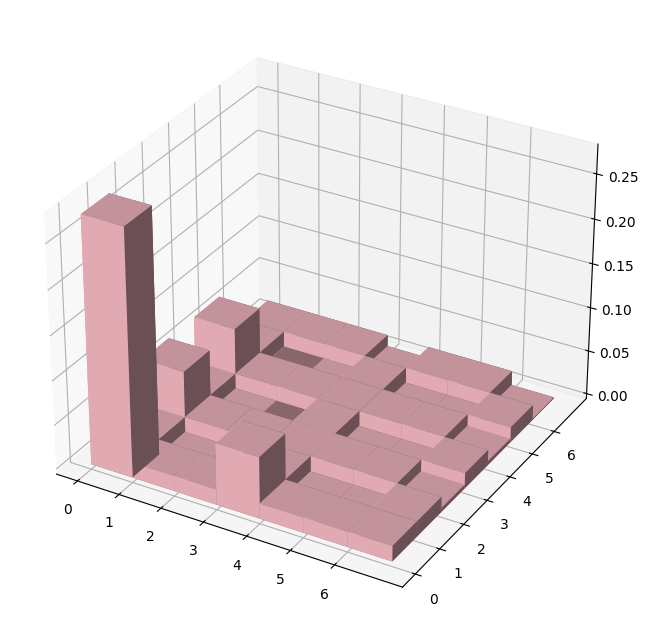

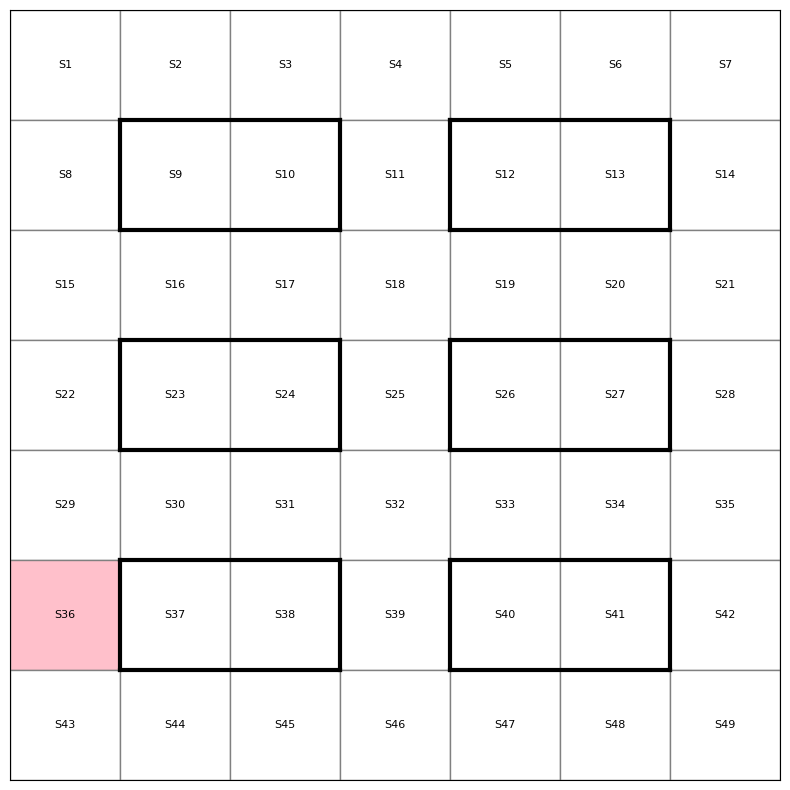

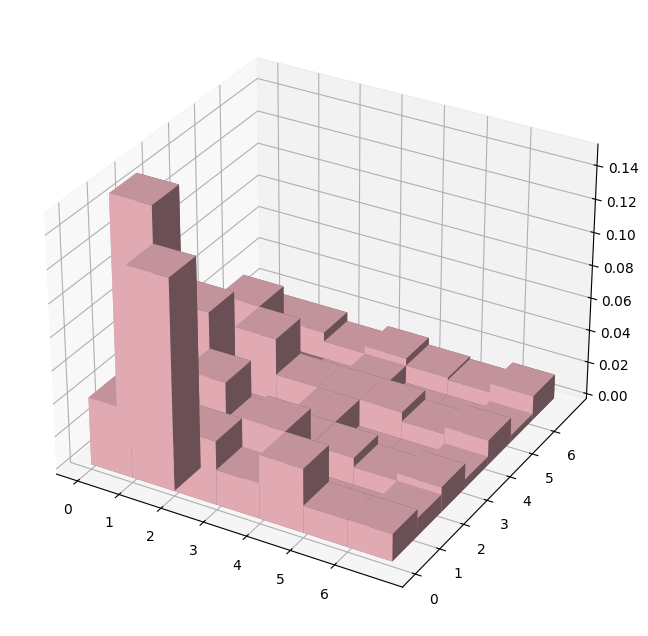

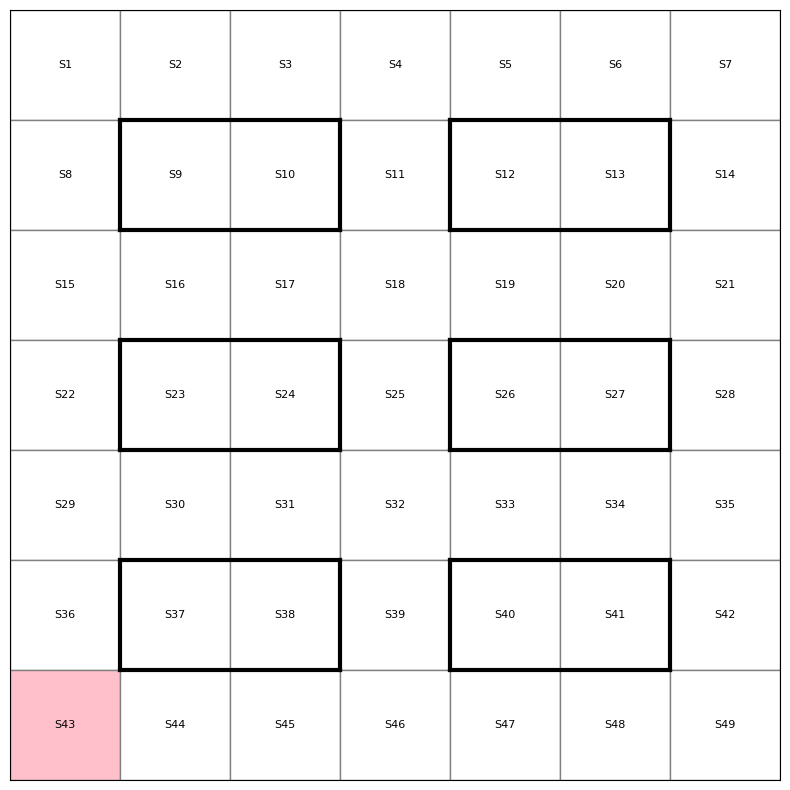

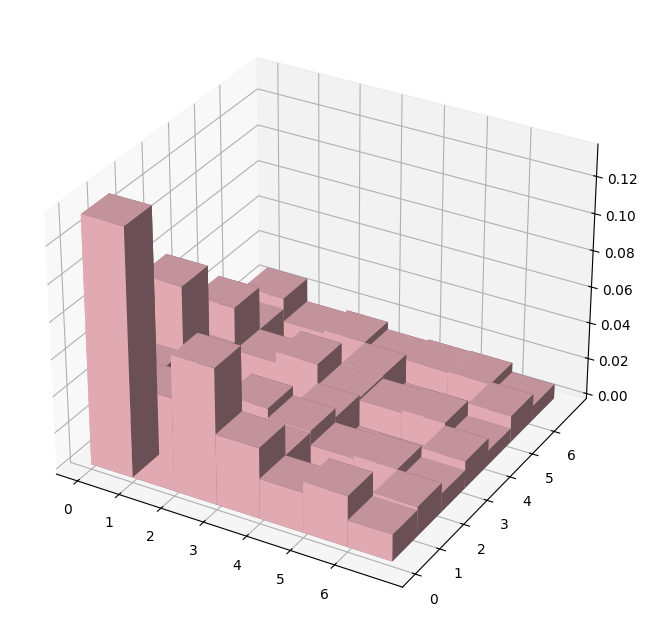

In [6]:
state_1 = Model.filtering(observation_matrix_WS)
index=np.argmax(state_1)
Model.map(index)
Model.plot_state()

state_2 = Model.prediction()
index=np.argmax(state_2)
Model.map(index)
Model.plot_state()

state_3 = Model.prediction()
index=np.argmax(state_3)
Model.map(index)
Model.plot_state()

